In [10]:
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
train_data = pd.read_csv("5G移动用户使用预测挑战赛公开数据/train.csv")
test_data = pd.read_csv("5G移动用户使用预测挑战赛公开数据/test.csv")

<Axes: >

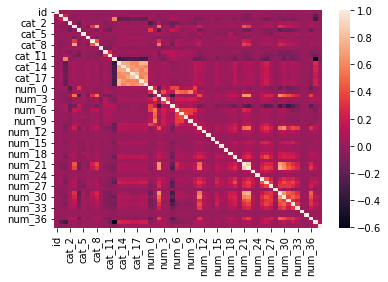

In [11]:
sns.heatmap(train_data.corr().round(3))

<Axes: >

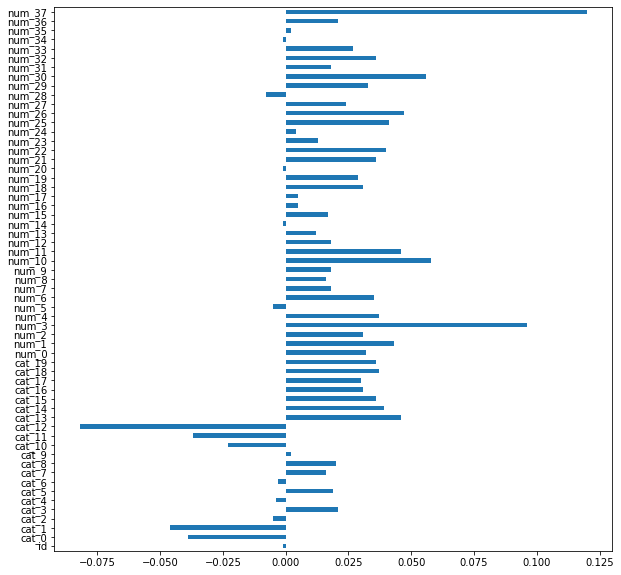

In [15]:
train_data.corr().round(3).target.iloc[:-1].plot(kind='barh', figsize=(10, 10))

In [19]:
train_data['target'].value_counts()

0.0    789400
1.0     10600
Name: target, dtype: int64

In [16]:
train_data.isnull().mean(0)

id        0.0
cat_0     0.0
cat_1     0.0
cat_2     0.0
cat_3     0.0
cat_4     0.0
cat_5     0.0
cat_6     0.0
cat_7     0.0
cat_8     0.0
cat_9     0.0
cat_10    0.0
cat_11    0.0
cat_12    0.0
cat_13    0.0
cat_14    0.0
cat_15    0.0
cat_16    0.0
cat_17    0.0
cat_18    0.0
cat_19    0.0
num_0     0.0
num_1     0.0
num_2     0.0
num_3     0.0
num_4     0.0
num_5     0.0
num_6     0.0
num_7     0.0
num_8     0.0
num_9     0.0
num_10    0.0
num_11    0.0
num_12    0.0
num_13    0.0
num_14    0.0
num_15    0.0
num_16    0.0
num_17    0.0
num_18    0.0
num_19    0.0
num_20    0.0
num_21    0.0
num_22    0.0
num_23    0.0
num_24    0.0
num_25    0.0
num_26    0.0
num_27    0.0
num_28    0.0
num_29    0.0
num_30    0.0
num_31    0.0
num_32    0.0
num_33    0.0
num_34    0.0
num_35    0.0
num_36    0.0
num_37    0.0
target    0.0
dtype: float64

In [20]:
import lightgbm as lgb

m = lgb.LGBMClassifier()
m.fit(
    train_data.drop(['id', 'target'], axis=1),
    train_data['target']
)

[LightGBM] [Info] Number of positive: 10600, number of negative: 789400
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.463075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9433
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.013250 -> initscore=-4.310419
[LightGBM] [Info] Start training from score -4.310419


LGBMClassifier()

In [25]:
pd.DataFrame(
    {
        "id": test_data['id'],
        "target": m.predict_proba(test_data.drop(['id'], axis=1))[:, 1].round(4)
    }
).to_csv('submit.csv', index=None)